<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
data=pd.read_csv("Bank Customer Churn Prediction.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Okay, nous voyons que la base de données comporte 12 variables et 10.000 clients.
Vérifions si nous n'avons pas des valeurs manquantes

In [ ]:
data.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


Okay, nous n'avons pas de valeurs manquantes dans notre jeu de données.
Renommons nos variables en francais pour une étude approfondie

In [ ]:
data = data.rename(columns={
    "customer_id": "identifiant_client",
    "credit_score": "score_credit",
    "country": "pays",
    "gender": "sexe",
    "age": "age",
    "tenure": "anciennete",
    "balance": "solde",
    "products_number": "nombre_produits",
    "credit_card": "carte_credit",
    "active_member": "membre_actif",
    "estimated_salary": "salaire_estime"
    # keep "churn" unchanged
})

In [ ]:
data

,identifiant_client,score_credit,pays,sexe,age,anciennete,solde,nombre_produits,carte_credit,membre_actif,salaire_estime,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head()

,identifiant_client,score_credit,pays,sexe,age,anciennete,solde,nombre_produits,carte_credit,membre_actif,salaire_estime,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Nous pouvons passer à l'analyse uni-varié de notre base de données

In [ ]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r',
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary',
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare',
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20',
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

Analyse de la variable cible "Churn".
Le churn (ou taux de désabonnement) est un terme couramment utilisé dans le domaine du marketing, de la gestion de la clientèle et des abonnements pour désigner le phénomène de perte de clients ou d'utilisateurs sur une période donnée.
Voyons voir la proportion de churn de notre banque🤔

churn
0    7963
1    2037
Name: count, dtype: int64


/tmp/ipython-input-65313005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn',data=data,palette = colors[value])


<Axes: xlabel='churn', ylabel='count'>

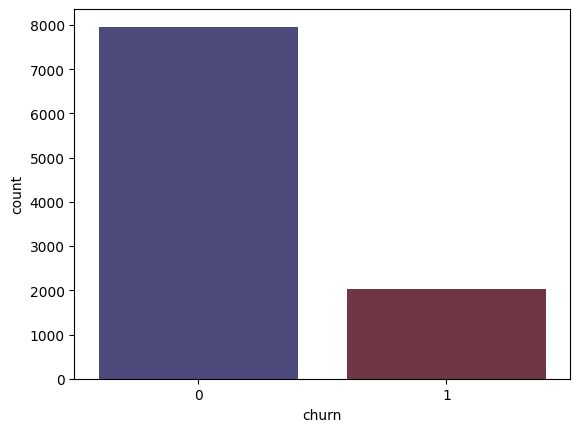

In [ ]:
value = randint(0, len(colors)-1)
print(data['churn'].value_counts())
sns.countplot(x='churn',data=data,palette = colors[value])

Nous votons clairement à travers le graphe que la banque connait un taux de résiliation faible de sa clientèle 7963 pour 2037. Nous constatons aussi que notre variable cible est quelque peu déséquilibré.Il faudrait vérifier si cela ne pose pas de problème pour les performances de notre modèle..
Voyons voir si nous n'avons pas d'autres variables catégorielles

In [ ]:
# 1. Variables catégorielles (object + variables binaires 0/1)
cat_var = data.select_dtypes(include=['object']).columns.tolist()  # 'country', 'gender'
cat_var += ['membre_actif', 'carte_credit']  # Ajout des colonnes binaires

# 2. Variables numériques (int64 + float64 SAUF celles déjà dans cat_var)
num_var = [col for col in data.select_dtypes(include=['int64', 'float64']).columns
           if col not in ['carte_credit', 'membre_actif','churn']]

# Affichage
print("Catégorielles :", cat_var)
print("Numériques :", num_var)

Catégorielles : ['pays', 'sexe', 'membre_actif', 'carte_credit']
Numériques : ['identifiant_client', 'score_credit', 'age', 'anciennete', 'solde', 'nombre_produits', 'salaire_estime']


Nous avons en tout 5 variables catégorielles et 6 variables numériques..
Continuons avec l'analyse des variables catégorielles

pays
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


/tmp/ipython-input-3461769264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pays',data=data,palette = colors[value])


<Axes: xlabel='pays', ylabel='count'>

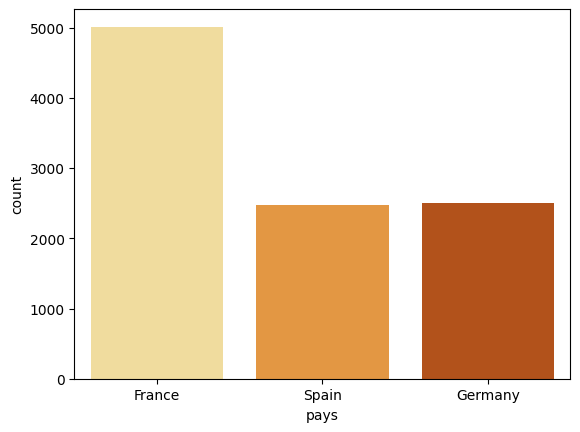

In [ ]:
value = randint(0, len(colors)-1)
print(data['pays'].value_counts())
sns.countplot(x='pays',data=data,palette = colors[value])

sexe
Male      5457
Female    4543
Name: count, dtype: int64


/tmp/ipython-input-1045641784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexe',data=data,palette = colors[value])


<Axes: xlabel='sexe', ylabel='count'>

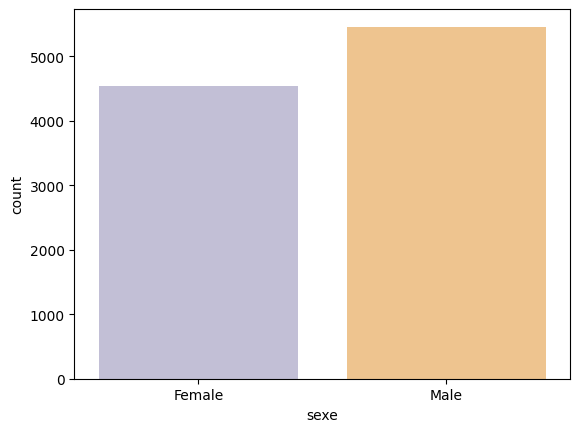

In [ ]:
value = randint(0, len(colors)-1)
print(data['sexe'].value_counts())
sns.countplot(x='sexe',data=data,palette = colors[value])

membre_actif
1    5151
0    4849
Name: count, dtype: int64


/tmp/ipython-input-735832600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='membre_actif',data=data,palette = colors[value])


<Axes: xlabel='membre_actif', ylabel='count'>

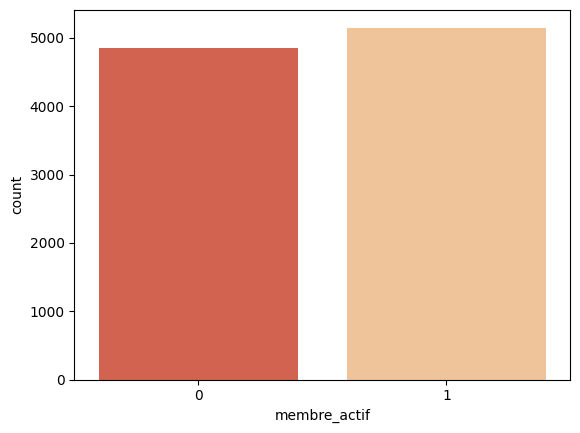

In [ ]:
value = randint(0, len(colors)-1)
print(data['membre_actif'].value_counts())
sns.countplot(x='membre_actif',data=data,palette = colors[value])

carte_credit
1    7055
0    2945
Name: count, dtype: int64


/tmp/ipython-input-3178554907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='carte_credit',data=data,palette = colors[value])


<Axes: xlabel='carte_credit', ylabel='count'>

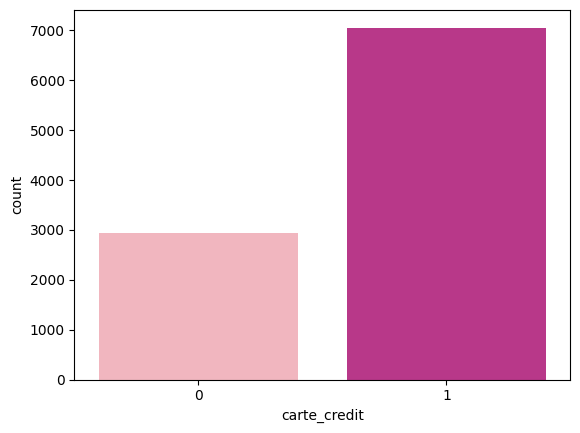

In [ ]:
value = randint(0, len(colors)-1)
print(data['carte_credit'].value_counts())
sns.countplot(x='carte_credit',data=data,palette = colors[value])

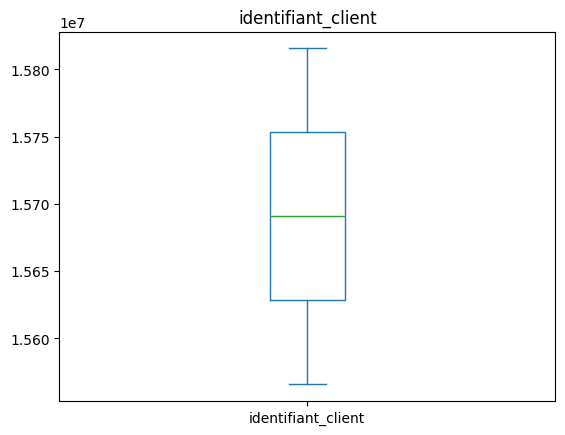

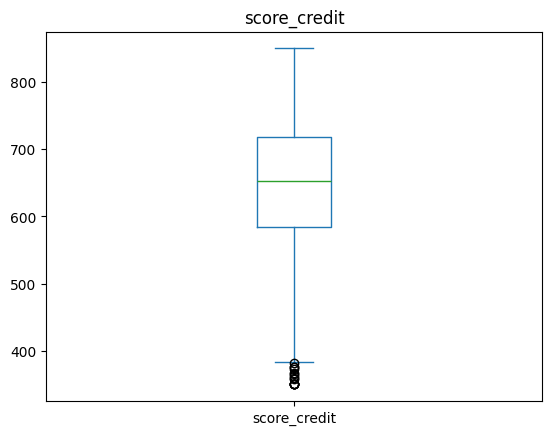

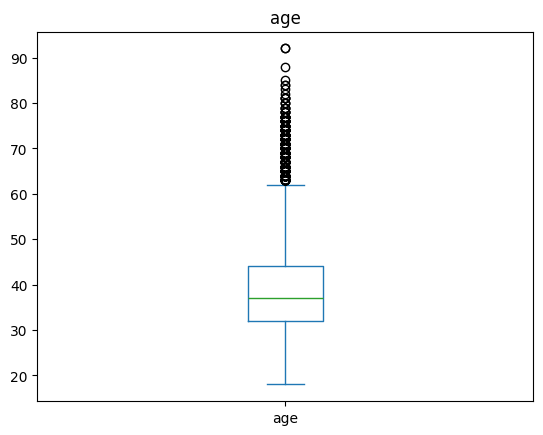

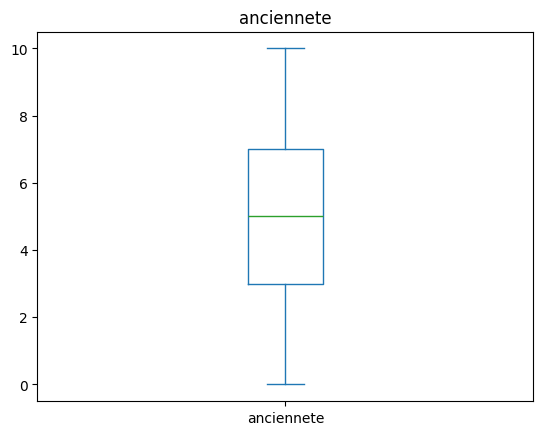

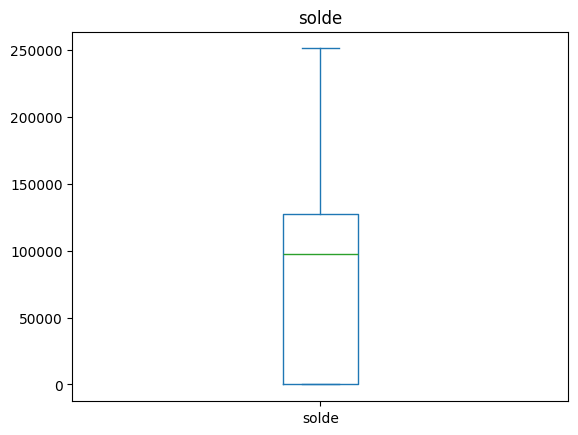

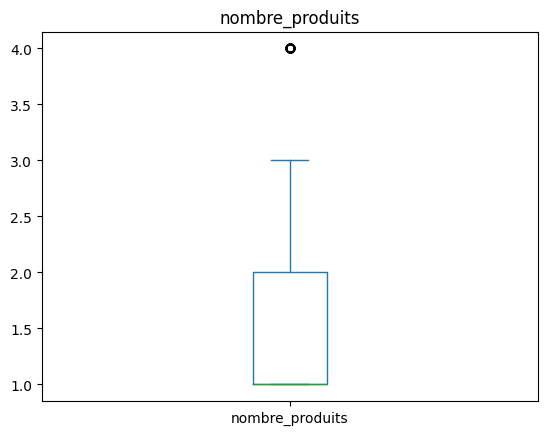

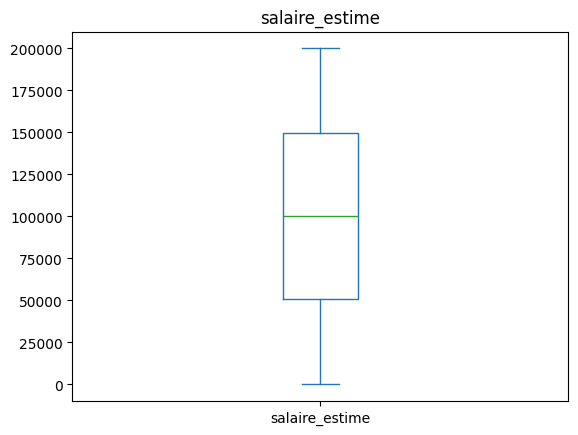

In [ ]:
#Passons à l'analyse des variables numériques, nous allons utiliser les boxplots...
for var in num_var:
     data[var].plot(kind='box')
     plt.title(var)
     plt.show()

In [ ]:
data.describe()

,identifiant_client,score_credit,age,anciennete,solde,nombre_produits,carte_credit,membre_actif,salaire_estime,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Nous avons une meilleure vue des variables de notre jeu de données.
Maintenant,nous allons faire des analyses bi-variées entre les différentes variables et la variable cible..

<Axes: xlabel='pays', ylabel='count'>

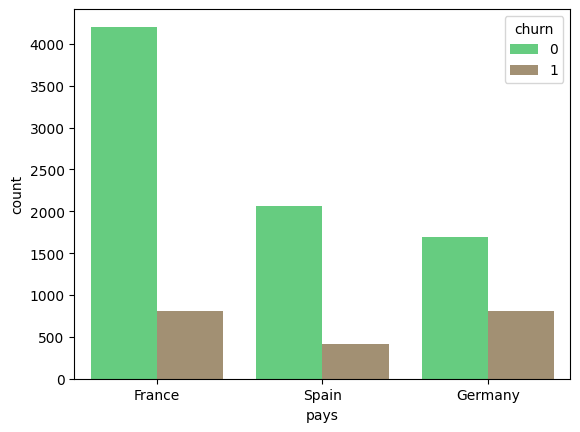

In [ ]:
#Commençons d'abord à étudier la relation entre le churn et les variables catégorielles
#Essayons de voir cela avec la visualisation
value = randint(0, len(colors)-1)
sns.countplot(x='pays',hue='churn',data = data,palette = colors[value])

<Axes: xlabel='sexe', ylabel='count'>

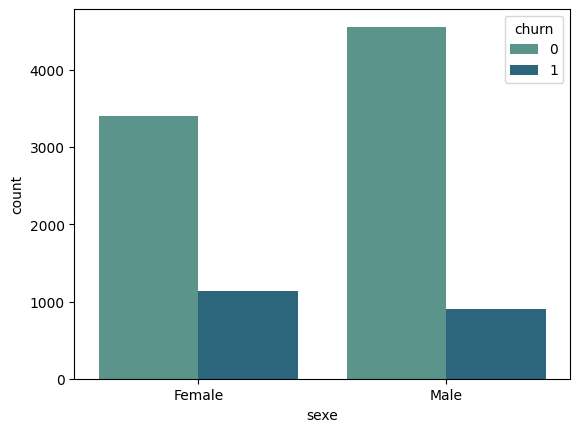

In [ ]:
value = randint(0, len(colors)-1)
sns.countplot(x='sexe',hue='churn',data = data,palette = colors[value])

<Axes: xlabel='membre_actif', ylabel='count'>

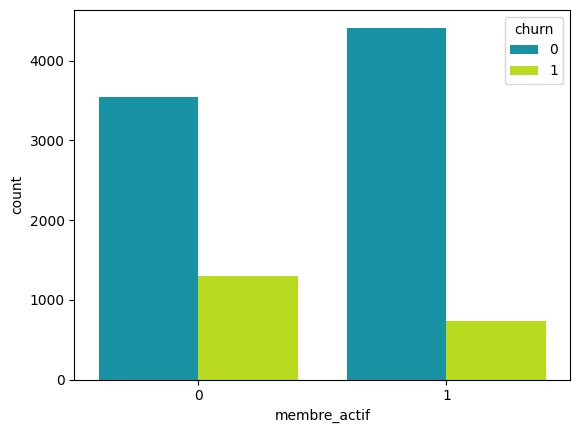

In [ ]:
value = randint(0, len(colors)-1)
sns.countplot(x='membre_actif',hue='churn',data = data,palette = colors[value])

<Axes: xlabel='carte_credit', ylabel='count'>

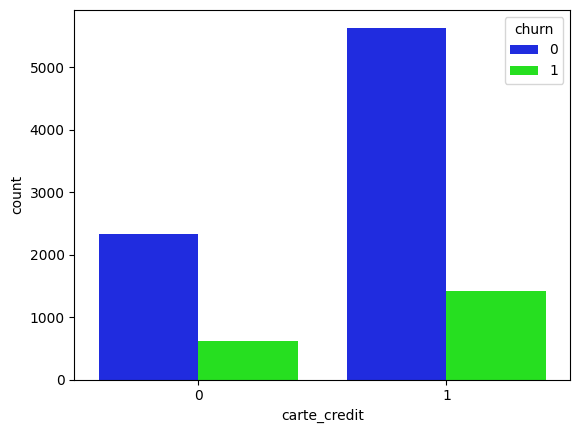

In [ ]:
value = randint(0, len(colors)-1)
sns.countplot(x='carte_credit',hue='churn',data = data,palette = colors[value])

In [ ]:
from scipy.stats import chi2_contingency
#Initialize lists to store results
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

for var in cat_var:
  contingency_table = pd.crosstab(data['churn'], data[var])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()  # total number of observations
  phi2 = chi2 / n  # phi-squared
  r, k = contingency_table.shape  # number of rows and columns
  # Bias correction (used when the table is not square or sample is small)
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rc = r - ((r-1)**2)/(n-1)
  kc = k - ((k-1)**2)/(n-1)
  cramer_v = np.sqrt(phi2corr / min(rc - 1, kc - 1))
  var_names.append(var)
  chi2_stats.append(chi2)
  p_values.append(p)
  cramer_vs.append(cramer_v)

results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})
results_df.sort_values(by='V de Cramer', inplace=True, ascending=False)
print(results_df)

       Variable        Chi2      P-valeur  V de Cramer
0          pays  301.255337  3.830318e-66     0.172999
2  membre_actif  242.985342  8.785858e-55     0.155567
1          sexe  112.918571  2.248210e-26     0.105797
3  carte_credit    0.471338  4.923724e-01     0.000000


D'après le test de khi2 et les visualisations, nous voyons que plusieurs variables ont une influence forte sur le churn comme le pays, le sexe et l'activité du client...
Analysons maintenant la realtion entre le churn et les variables numériques

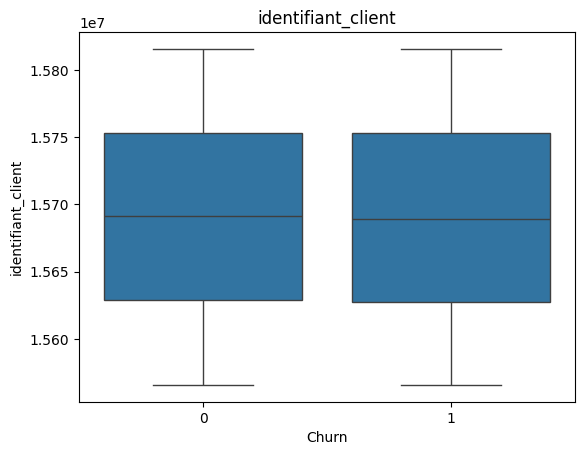

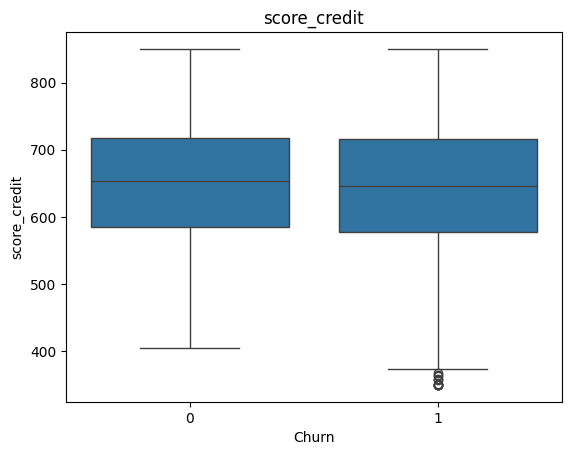

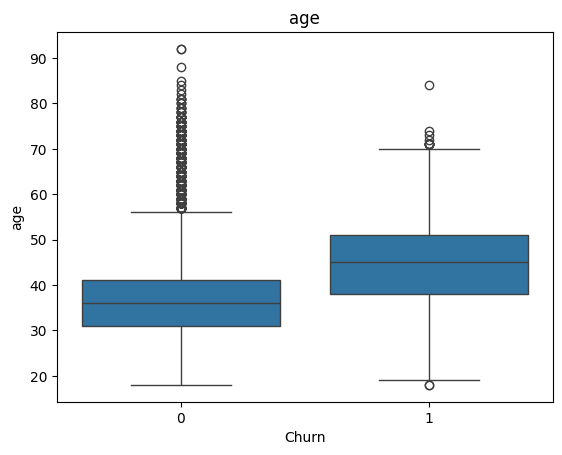

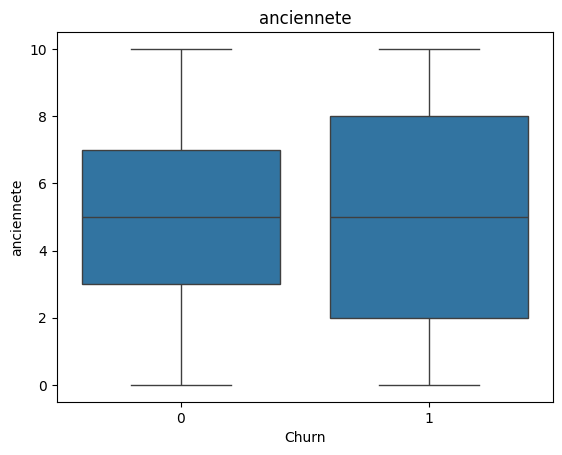

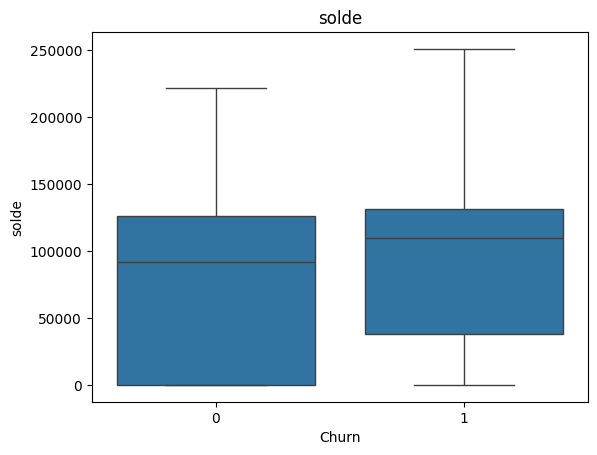

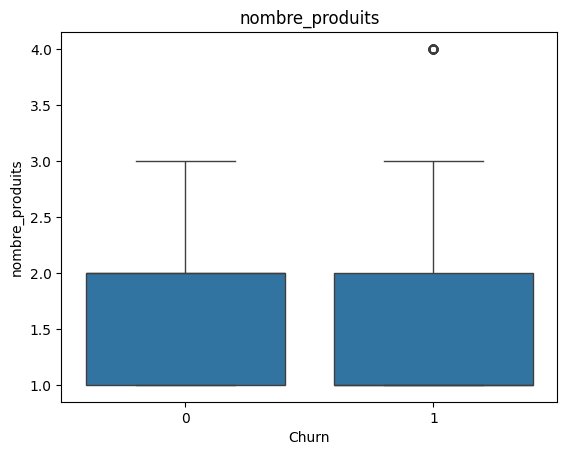

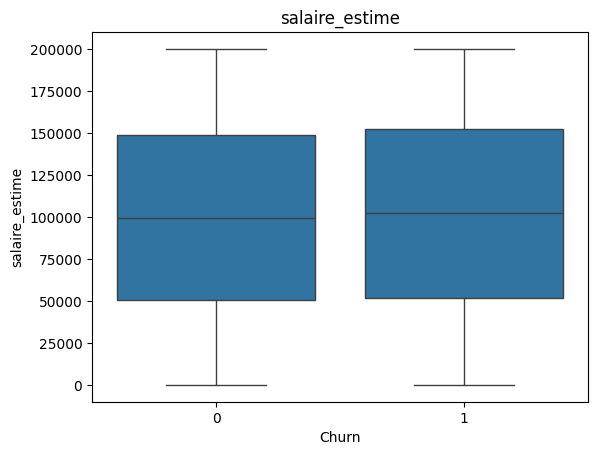

In [ ]:
for var in num_var:
    sns.boxplot(x='churn', y=var, data=data)
    plt.title(var)
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []
significatifs = []

# Parcourir toutes les variables numériques
for var in num_var:
    # Créer deux groupes selon la variable cible (ici : binaire 0/1)
    group0 = data[data['churn'] == 0][var]
    group1 = data[data['churn'] == 1][var]

    # Appliquer le test de Kruskal-Wallis
    kw_stat, p_val = stats.kruskal(group0, group1)

    # Déterminer si la différence est significative
    est_significatif = "OUI" if p_val < 0.05 else "NON"

    # Stocker les résultats
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p_val)
    significatifs.append(est_significatif)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values,
    'Significatif': significatifs
})

# Trier les résultats par P-valeur croissante
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher les résultats
print(results_df)


             Variable  Kruskal-Wallis       P-valeur Significatif
2                 age     1049.447127  3.209954e-230          OUI
5     nombre_produits      156.940258   5.274780e-36          OUI
4               solde      123.442405   1.115785e-28          OUI
1        score_credit        5.423418   1.986843e-02          OUI
3          anciennete        1.953665   1.621925e-01          NON
6      salaire_estime        1.459248   2.270499e-01          NON
0  identifiant_client        0.392306   5.310897e-01          NON


D'après le test statistique de Kruskal-Wallys, nous voyons que des variables significatives du churn à savoir l'âge,le nombre de produits,le solde,le solde crédit..


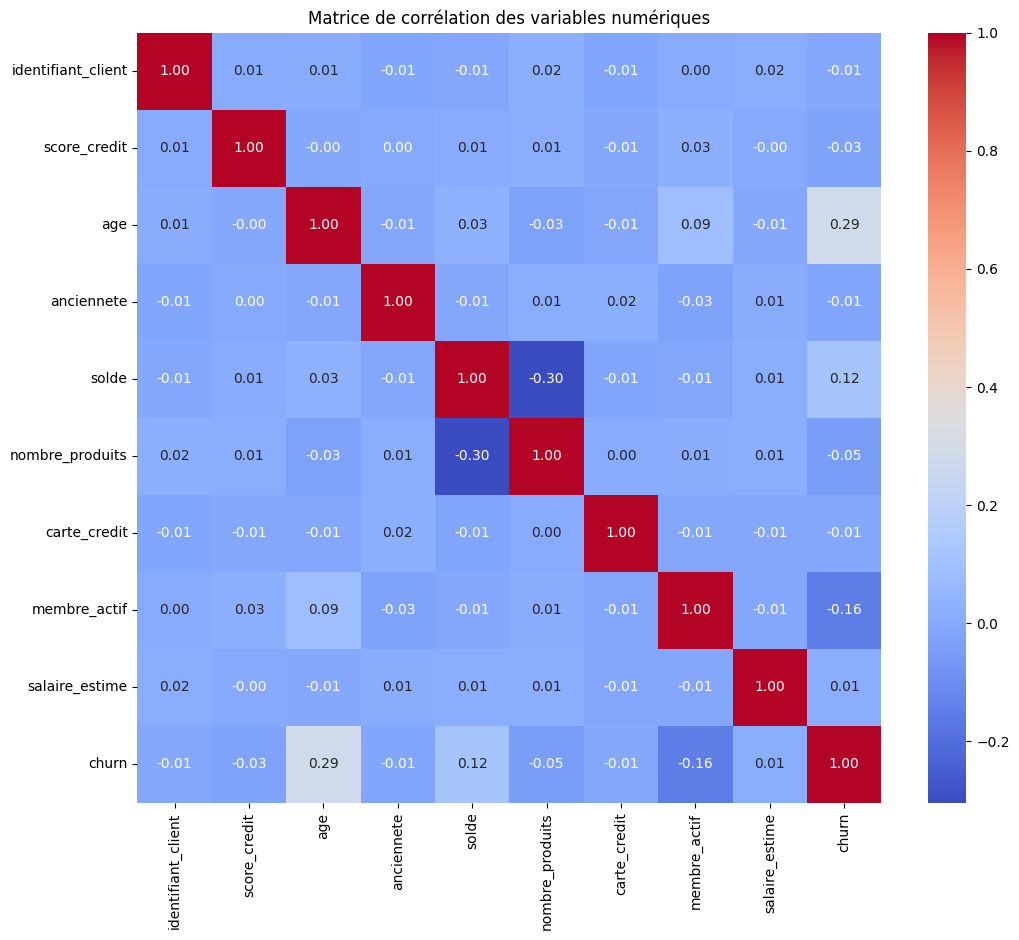

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer les colonnes numériques (en excluant les catégorielles)
num_data = data.select_dtypes(include=['int64', 'float64'])

# 2. Calculer la matrice de corrélation
corr = num_data.corr()

# 3. Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # fmt pour contrôler les décimales
plt.title("Matrice de corrélation des variables numériques")
plt.show()

Grâce à la matrice de correlation, nous voyons clairement qu'il y'a pas de multicolinéarité dans les variables numériques..
Nous pouvons commencer notre entrainement avec un modèle de régression logistique.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler  # Si normalisation nécessaire

X = data.drop(columns=['churn', 'identifiant_client'])  # Exclure la cible et les colonnes non pertinentes
y = data['churn']  # Variable cible

# Encodage des catégories (ex: "country", "gender") avec pd.get_dummies()
X = pd.get_dummies(X, columns=['pays', 'sexe'], drop_first=True)
# drop_first=True pour éviter la colinéarité
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# test_size=0.2 : 20% des données en test
model = LogisticRegression(max_iter=1000)  # max_iter pour éviter les warnings
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Métriques principales
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.811

Matrice de confusion:
 [[1543   64]
 [ 314   79]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Le rapport de classification, nous voyons que le f1_score pour les clients qui résient leurs contrats est de 0,29 qui est très faible.
Essayons de faire du sur-échantillonage pour équilibrer les classes...

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model2 = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced') # Increased iterations
model2.fit(X_train_resampled, y_train_resampled)

y_pred_2 = model2.predict(X_test)

# Métriques principales
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_2))
print("\nRapport de classification:\n", classification_report(y_test, y_pred_2))

Accuracy: 0.721

Matrice de confusion:
 [[1163  444]
 [ 114  279]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



Waouh,nous voyons une nette amélioration dans le bilan de la classification en utilisant la méthode de sur-échantillonage.. Par exemple avec unn f1_score égale à 0,5à pour la classe des clients perdus par la sociéte.
Toutefois, nous constatons une baisse au niveau de la précision pour cette classe.
Ce qui peut être un problème..
Il faudrait envisager la possibilité d'une non-linéarité entre les différentes variables

# Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree  # Pour visualiser l'arbre
import matplotlib.pyplot as plt

In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=5,       # Limite la profondeur
    min_samples_split=20,  # Nombre min d'échantillons pour diviser un nœud
    min_samples_leaf=10,   # Nombre min d'échantillons dans une feuille
    random_state=42
)
# Entraînement
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Métriques
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.858

Matrice de confusion:
 [[1560   47]
 [ 237  156]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



Nous voyons que l'arbre de décision a de meilleurs résultats..
L'hypothèse de non-linéairté est verifiée avec une précision supérieur pour la classe 1. Ce qui est vraiment très intéressant.

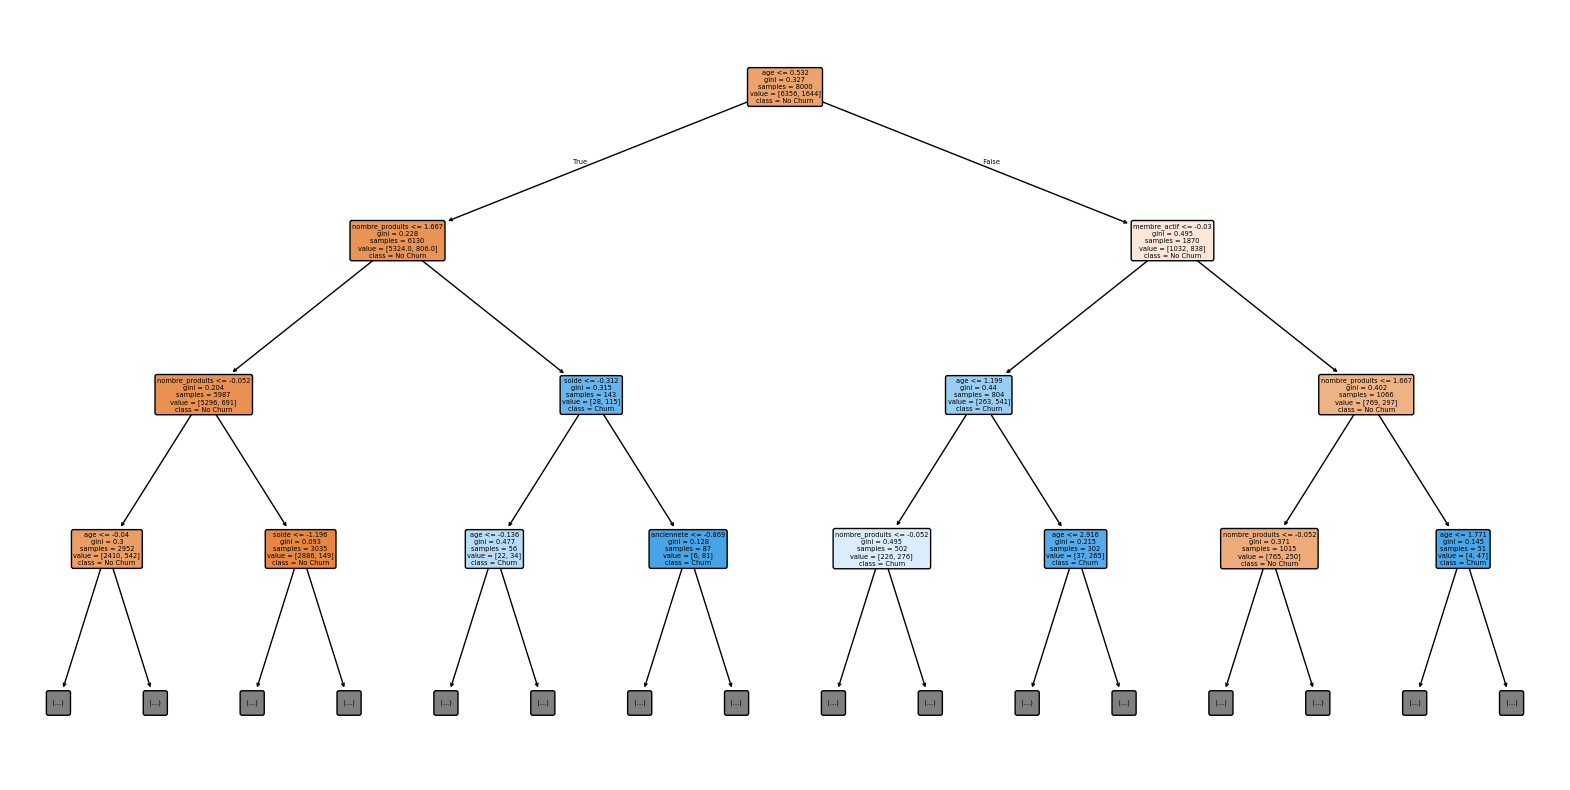

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],  # Noms des classes
          filled=True,  # Couleurs selon les classes
          rounded=True,
          max_depth=3)  # Limite la profondeur pour la lisibilité
plt.show()

# Support Vectors Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # Crucial pour SVM !
from sklearn.pipeline import make_pipeline  # Pour simplifier le preprocessing

In [ ]:
# Création d'un pipeline : Normalisation + SVC
svm_model = make_pipeline(
    StandardScaler(),  # Normalisation (moyenne=0, écart-type=1)
    SVC(kernel='rbf', C=1.0,gamma=0.1, random_state=42)  # Kernel radial (RBF) par défaut
)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.856

Matrice de confusion:
 [[1561   46]
 [ 242  151]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



Nous votons les mêmes résultats similaire à l'Arbre de décision..
Essayons d'optimiser les hyperparamètres avec un gridSearchCV...

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 1, 10],  # Valeurs à tester pour C
    'svc__gamma': [0.01, 0.1, 1],  # Valeurs pour gamma
    'svc__kernel': ['rbf', 'linear']  # Types de kernel
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


# KNN

In [ ]:
from sklearn.pipeline import Pipeline
# Pipeline : Normalisation + KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation
    ('knn', KNeighborsClassifier())  # Modèle KNN
])
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.83

Matrice de confusion:
 [[1514   93]
 [ 247  146]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



Nous voyons une nette amélioration au niveau des clients résiliants.
Essayons d'améliorer avec les hyperparamètres..

In [ ]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10, 15],  # Valeurs de k à tester
    'knn__weights': ['uniform', 'distance'],  # Poids des voisins
    'knn__metric': ['euclidean', 'manhattan']  # Métriques de distance
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'knn__metric': 'euclidean', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}


In [ ]:
# Récupérer le meilleur modèle
best_knn = grid_search.best_estimator_

# Prédictions
y_pred_optimized = best_knn.predict(X_test)

# Évaluation finale
print("\nRapport de classification optimisé:\n", classification_report(y_test, y_pred_optimized))


Rapport de classification optimisé:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.72      0.34      0.46       393

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



# Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.867

Matrice de confusion:
 [[1549   58]
 [ 208  185]]

Rapport de classification:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
param_grid = {
    'n_estimators': [100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20],  # Profondeur max des arbres
    'min_samples_split': [2, 5],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2],   # Nombre min d'échantillons dans une feuille
    'class_weight': [None, 'balanced']  # Gestion du déséquilibre des classes
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)

Meilleurs paramètres: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)

# Évaluation finale
print("\nRapport de classification optimisé:\n", classification_report(y_test, y_pred_optimized))


Rapport de classification optimisé:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



Nous voyons que le meilleur modèle pour la prédiction est le modèle de Random Forest avec des meilleurs performances au niveau de la classe 1 avec une précision égale à 0,78 avec un f1_score de 0,60